<a href="https://colab.research.google.com/github/AKVITA380/Deep-Learning-6-July-2024/blob/main/BinaryClassifiaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

Step 1: Read the dataset

In [4]:
url="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/booking_train.csv"
import pandas as pd
df=pd.read_csv(url)
df.head()


,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


Step 2 Check Basic Quality

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [6]:
df.isna().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [7]:
df.duplicated().sum()

0

Step 3 Seperate X and Y

In [8]:
X=df.drop(columns =['id','booking_status'])
Y=df[['booking_status']]

In [9]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [10]:
Y.head()

,booking_status
0,0
1,0
2,0
3,0
4,1


Step 4 Perform preprocessing on X

In [11]:
X.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
dtype: object

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [13]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                         ('Scaler',StandardScaler())]).set_output(transform='pandas')

In [14]:
X_pre= num_pipe.fit_transform(X)

In [15]:
X_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691


Step 5 Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X_pre,Y,test_size=0.2,random_state=42)

In [17]:
X_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
15559,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.479694,0.409661,1.203968,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.199998,1.842849
32783,0.151040,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,-0.381012,0.409661,1.557404,1.135971,0.428551,-0.173408,-0.060506,-0.101479,0.189388,0.552579
11797,2.056005,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.282330,0.409661,0.497095,-0.889123,0.428551,-0.173408,-0.060506,-0.101479,1.716096,-0.737691
39750,0.151040,-0.313454,-0.998814,-0.979466,2.996268,-0.160945,-0.515173,1.444607,0.409661,0.143658,-0.439102,-1.149928,-0.173408,-0.060506,-0.101479,0.280936,0.552579
28711,0.151040,-0.313454,1.259332,0.421768,-0.407020,-0.160945,0.685890,-0.109636,0.409661,0.850531,-1.001628,0.428551,-0.173408,-0.060506,-0.101479,0.746758,-0.737691


In [18]:
Y_train.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [19]:
X_test.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
8768,0.15104,-0.313454,-0.998814,0.421768,-0.40702,-0.160945,-0.515173,-0.566041,0.409661,-2.330398,1.135971,-1.149928,-0.173408,-0.060506,-0.101479,-0.643436,0.552579
38340,0.15104,-0.313454,-0.998814,-0.278849,-0.40702,-0.160945,-0.515173,1.481613,0.409661,0.143658,-1.564154,0.428551,-0.173408,-0.060506,-0.101479,-0.285588,-0.737691
7104,0.15104,-0.313454,1.259332,-0.979466,-0.40702,-0.160945,4.289080,-0.553706,0.409661,-1.623525,1.023466,0.428551,-0.173408,-0.060506,-0.101479,0.002252,-0.737691
36898,0.15104,1.908162,1.259332,1.122386,-0.40702,-0.160945,-0.515173,-0.566041,0.409661,1.203968,-0.551607,0.428551,-0.173408,-0.060506,-0.101479,0.541312,3.133119
9747,0.15104,-0.313454,1.259332,0.421768,-0.40702,-0.160945,-0.515173,0.507127,0.409661,-1.270088,1.585992,0.428551,-0.173408,-0.060506,-0.101479,-0.366636,0.552579


In [20]:
Y_test.head()

,booking_status
8768,0
38340,1
7104,0
36898,0
9747,0


In [21]:
X_train.shape

(33680, 17)

In [22]:
X_test.shape

(8420, 17)

Building Neuron Network


Dropout layer - Randomly drop some % of neuron links

In [23]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout

In [24]:
# Initialize the model
model=Sequential()

In [25]:
from itertools import accumulate
# Add the input layer and the first hidden layer

model.add(Input(shape=(X_train.shape[1],)))

# Hidden layer 1
model.add(Dense(65,activation='relu'))

# add Dropout layer 1
model.add(Dropout(0.4))

# Hidden layer 2
model.add(Dense(32,activation='relu'))

# add Dropout layer 2
model.add(Dropout(0.3))

# Add Outer layer
model.add(Dense(1,activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 65)                1170      
                                                                 
 dropout (Dropout)           (None, 65)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3315 (12.95 KB)
Trainable params: 3315 (12.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [28]:
hist = model.fit(X_train,Y_train,epochs =60,validation_split=0.1)

Epoch 1/60
948/948 [==============================] - 7s 4ms/step - loss: 0.5278 - accuracy: 0.7368 - val_loss: 0.4874 - val_accuracy: 0.7666
Epoch 2/60
948/948 [==============================] - 3s 3ms/step - loss: 0.4880 - accuracy: 0.7696 - val_loss: 0.4806 - val_accuracy: 0.7743
Epoch 3/60
948/948 [==============================] - 4s 4ms/step - loss: 0.4753 - accuracy: 0.7765 - val_loss: 0.4749 - val_accuracy: 0.7815
Epoch 4/60
948/948 [==============================] - 3s 3ms/step - loss: 0.4715 - accuracy: 0.7806 - val_loss: 0.4731 - val_accuracy: 0.7838
Epoch 5/60
948/948 [==============================] - 4s 4ms/step - loss: 0.4685 - accuracy: 0.7831 - val_loss: 0.4700 - val_accuracy: 0.7850
Epoch 6/60
948/948 [==============================] - 4s 4ms/step - loss: 0.4647 - accuracy: 0.7869 - val_loss: 0.4672 - val_accuracy: 0.7919
Epoch 7/60
948/948 [==============================] - 4s 4ms/step - loss: 0.4626 - accuracy: 0.7866 - val_loss: 0.4654 - val_accuracy: 0.7883
Epoch 

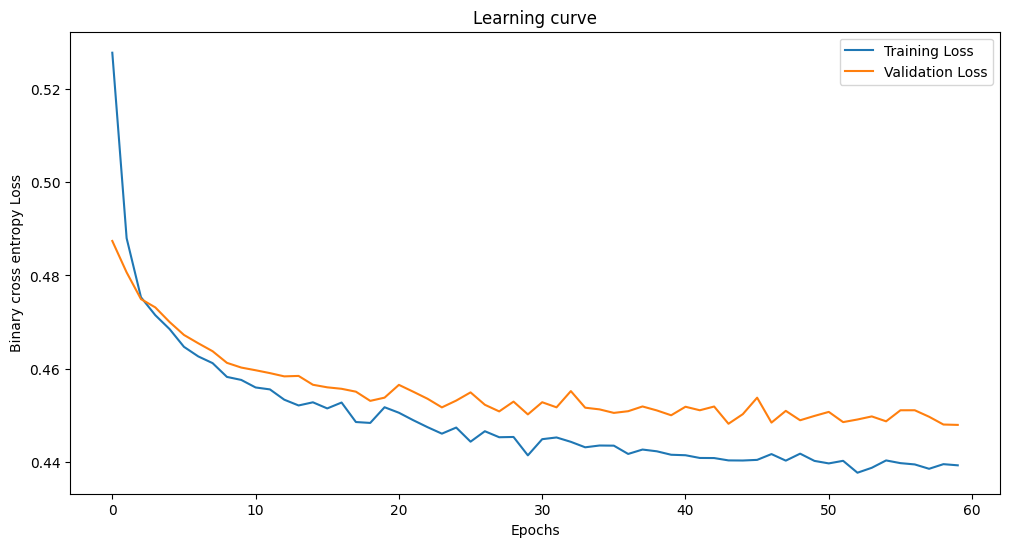

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'],label="Training Loss")
plt.plot(hist.history['val_loss'],label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Binary cross entropy Loss")
plt.title("Learning curve")
plt.legend()
plt.show()

In [30]:
model.evaluate(X_train,Y_train)

1053/1053 [==============================] - 2s 2ms/step - loss: 0.4206 - accuracy: 0.8123


[0.420585036277771, 0.8123218417167664]

In [31]:
model.evaluate(X_test,Y_test)

264/264 [==============================] - 1s 2ms/step - loss: 0.4276 - accuracy: 0.8068


[0.42760929465293884, 0.806769609451294]

Get predictions on train and test

In [32]:
yprob_train=model.predict(X_train)
yprob_test=model.predict(X_test)

264/264 [==============================] - 0s 1ms/step


In [33]:
yprob_train[0:5]

array([[0.00991486],
       [0.18727267],
       [0.7965041 ],
       [0.77532816],
       [0.78540546]], dtype=float32)

In [34]:
yprob_test[0:5]


array([[0.04976363],
       [0.9272649 ],
       [0.39708635],
       [0.01772192],
       [0.184753  ]], dtype=float32)

In [35]:
Y_train.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [36]:
ypred_train = [1 if prob >=0.5 else 0 for prob in yprob_train]
ypred_test = [1 if prob >=0.5 else 0 for prob in yprob_test]

In [37]:
ypred_train[0:5]

[0, 0, 1, 1, 1]

In [38]:
Y_test.head()

,booking_status
8768,0
38340,1
7104,0
36898,0
9747,0


In [39]:
ypred_test[0:5]

[0, 1, 0, 0, 0]

In [40]:
yprob_test[0:5]

array([[0.04976363],
       [0.9272649 ],
       [0.39708635],
       [0.01772192],
       [0.184753  ]], dtype=float32)

Confusion Matrix

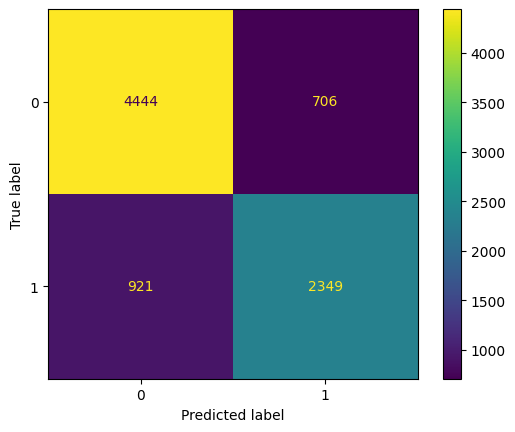

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test,ypred_test)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      5150
           1       0.77      0.72      0.74      3270

    accuracy                           0.81      8420
   macro avg       0.80      0.79      0.79      8420
weighted avg       0.81      0.81      0.81      8420



In [45]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,yprob_test)

0.8776211217006621

ROC_AUC score is more than 80% hence model is Good


out of sample predictions

In [46]:
url2= "https://raw.githubusercontent.com/yashasangani/Datasets/main/booking_test.csv"
xnew = pd.read_csv(url2)
xnew.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [47]:
X_new2=xnew.drop(columns=['id'])

In [48]:
X_new2

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28063,2,0,1,2,0,0,0,315,2018,9,30,1,0,0,0,160.00,0
28064,2,0,2,2,0,0,0,81,2018,3,25,0,0,0,0,65.00,1
28065,2,0,1,2,0,0,0,40,2018,10,22,0,0,0,0,85.00,0
28066,3,0,0,4,0,0,1,4,2018,9,6,1,0,0,0,162.75,0


In [50]:
xnew2_pre = num_pipe.transform(X_new2)
xnew2_pre.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.056005,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,0.087728,0.409661,1.557404,-1.226638,0.428551,-0.173408,-0.060506,-0.101479,0.297092,1.842849
1,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.010111,-2.441040,0.850531,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.526846,-0.737691
2,0.151040,4.129777,-0.998814,-0.979466,-0.407020,-0.160945,3.088017,-1.059452,0.409661,0.143658,-0.664112,0.428551,-0.173408,-0.060506,-0.101479,3.646696,0.552579
3,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.195983,0.409661,-0.916652,1.585992,-1.149928,-0.173408,-0.060506,-0.101479,-0.641282,-0.737691
4,-1.753925,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,-1.195140,0.409661,0.497095,0.573445,0.428551,-0.173408,-0.060506,-0.101479,1.061793,-0.737691


In [51]:
probs = model.predict(xnew2_pre)
probs[0:5]

878/878 [==============================] - 3s 3ms/step


array([[0.0846307 ],
       [0.03413908],
       [0.4352607 ],
       [0.16952121],
       [0.6214534 ]], dtype=float32)

In [52]:
preds = [1 if prob >=0.5 else 0 for prob in probs]
preds[0:5]


[0, 0, 0, 0, 1]

In [53]:
df_final = xnew[['id']]
df_final["booking_status"] = preds
df_final['probability'] = probs
df_final

,id,booking_status,probability
0,42100,0,0.084631
1,42101,0,0.034139
2,42102,0,0.435261
3,42103,0,0.169521
4,42104,1,0.621453
...,...,...,...
28063,70163,1,0.981250
28064,70164,0,0.057279
28065,70165,0,0.161184
28066,70166,0,0.493777


In [54]:
df_final['booking_status'].value_counts()

booking_status
0    17931
1    10137
Name: count, dtype: int64

<Axes: xlabel='booking_status'>

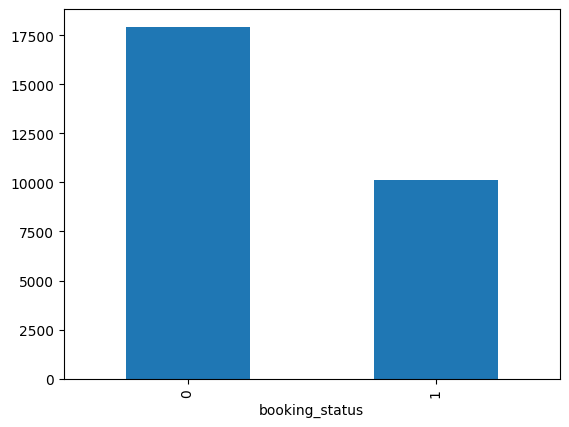

In [55]:
df_final['booking_status'].value_counts().plot(kind = 'bar')

In [56]:
df_final.to_csv('Results.csv',index = False)